In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
plt.style.use('seaborn')

# Data Preparation

In [42]:
dfx = pd.read_csv("./Training Data/Diabetes_XTrain.csv")
dfy = pd.read_csv("./Training Data/Diabetes_YTrain.csv")
x = dfx.values
y = dfy.values
x_train = x
y_train = y.reshape((-1))
print(x_train.shape)
# print(y_train)

(576, 8)


(array([375.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 201.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

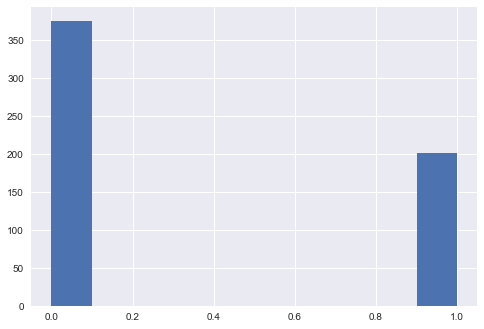

In [33]:
plt.hist(y_train)

# `KNN_ALGORITHM`

In [12]:

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    vals = np.array(vals)                   #convert this to array so as to pass it to unique function
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [46]:
#loading the test data set
dfx_test = pd.read_csv("./Testing Data/Diabetes_Xtest.csv")
x_test = dfx_test.values
print(x_test.shape)
print(x_train.shape)

(192, 8)
(576, 8)


In [48]:
#sample example which predicts for x_test[1]
pred = knn(x_train,y_train,x_test[1])

print(int(pred))

1


In [59]:
pred = []
m = x_test.shape[0]
for i in range(m):
    p = knn(x_train,y_train,x_test[i])
    pred.append(p)
pred = np.array(pred)
#convert the obtained list to CSV FILE
test = pd.DataFrame(pred)
test.to_csv('prediction.csv', index=False)

(array([129.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  63.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

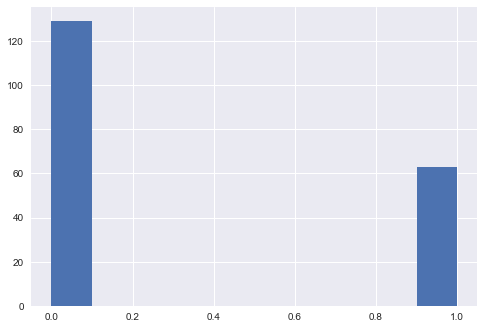

In [60]:
#plotting the histogram denoting the frequency of both classes
plt.hist(pred)